<a href="https://colab.research.google.com/github/Narae00/oss4thStudy/blob/main/oss4th02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 - 집값 예측

In [1]:
# prompt: /content/sample_data/california_housing_train.csv 데이터로부터 집 값을 예측하는 코드를 작성해줘.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 로드
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# 특성(X)과 타겟(y) 분리
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# 데이터 분할 (훈련 및 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가 (평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
print(f'평균 제곱 오차: {mse}')


평균 제곱 오차: 4634658406.223264


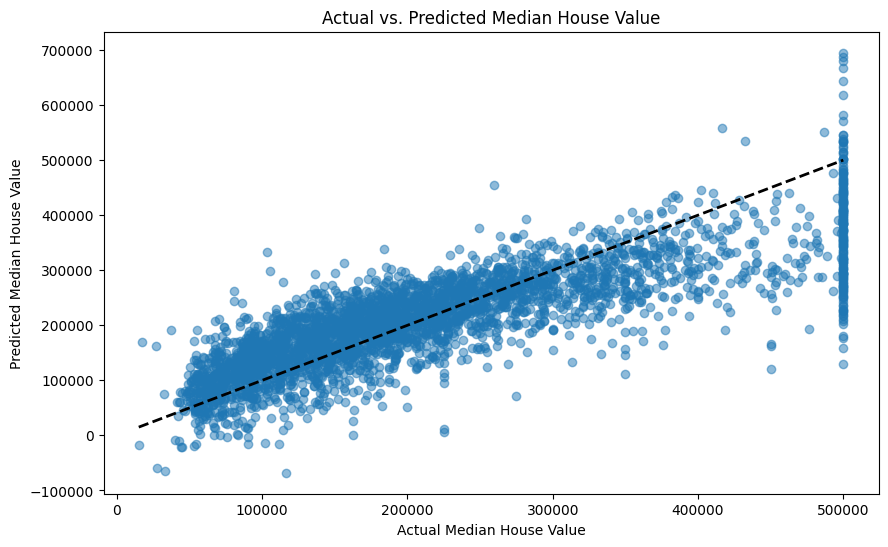

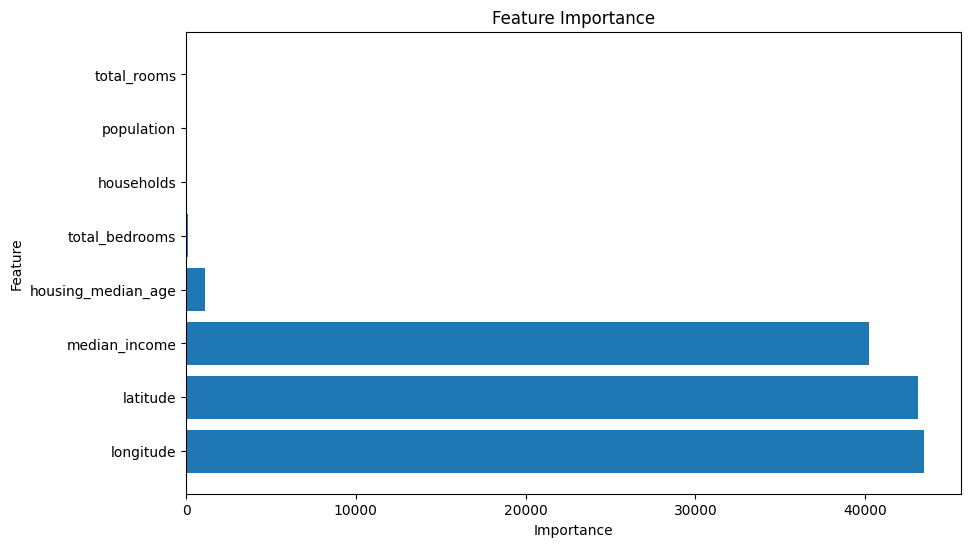

In [2]:
# prompt: 차트도 만들어줘

import matplotlib.pyplot as plt

# 실제값과 예측값 비교 차트
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Value')
plt.show()


# 특성 중요도 시각화 (계수 크기 기반)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(model.coef_)})
importance = importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
